*데이터 설명

연령: 환자의 연령

빈혈: 환자의 헤모글로빈 수준(Boolean)

크레아티닌_포스포키네이스: 혈중 CPK 효소 수준(mcg/L)

당뇨병: 당뇨병이 있는 경우(Boolean)

ejection_dll: 각 수축 시 심장에서 나가는 혈액의 비율

high_blood_pressure: 고혈압인 경우 (Boolean)

혈소판: 혈액의 혈소판 수(킬로플레이트렛/mL)

serum_creatinine: 혈중 혈청 크레아티닌 농도(mg/dL)

serum_continue: 혈중 혈청 나트륨 농도(mEq/L)

성별: 환자의 성별

흡연: 환자가 담배를 피우는지 여부(Boolean)

시간: 후속 조치 기간(일)

DEATH_EVENT: Follow up(팔로우업) 기간 동안 환자가 사망한 경우(Boolean)

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [4]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


## Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
#299 non-null values

[Text(0, 0, '203'), Text(0, 0, '96')]

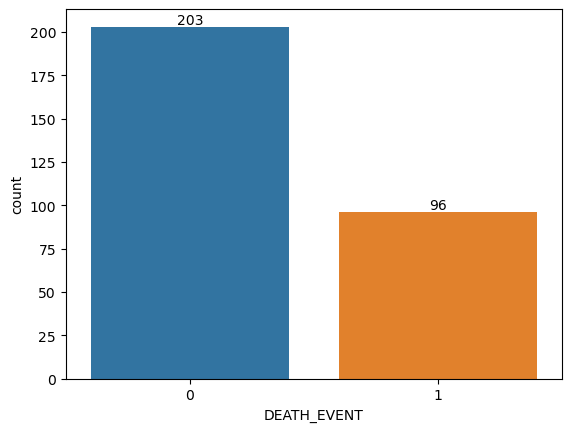

In [7]:
ax = sns.countplot(x=data["DEATH_EVENT"])
ax.bar_label(ax.containers[0])

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


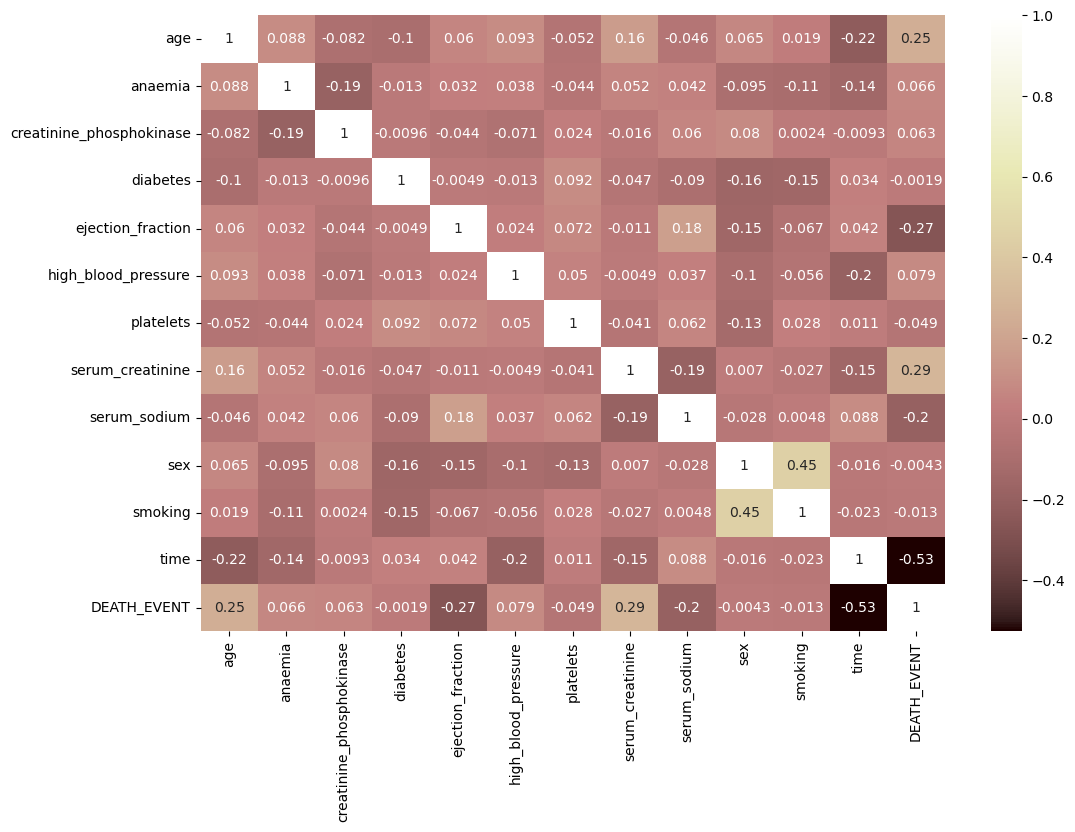

In [9]:
#요소별 상관관계 heatmap

corr = data.corr()

plt.figure(figsize = (12,8))
sns.heatmap(corr, cmap = 'pink', annot = True);

In [10]:
#가장 높은 상관관계 수치가 0.53 -> 전체적으로 요소별 상관관계 수치가 작다
#time(후속 조치 기간) - Death_event 상관성이 가장 높음

Text(0.5, 1.0, 'Distribution Of Age')

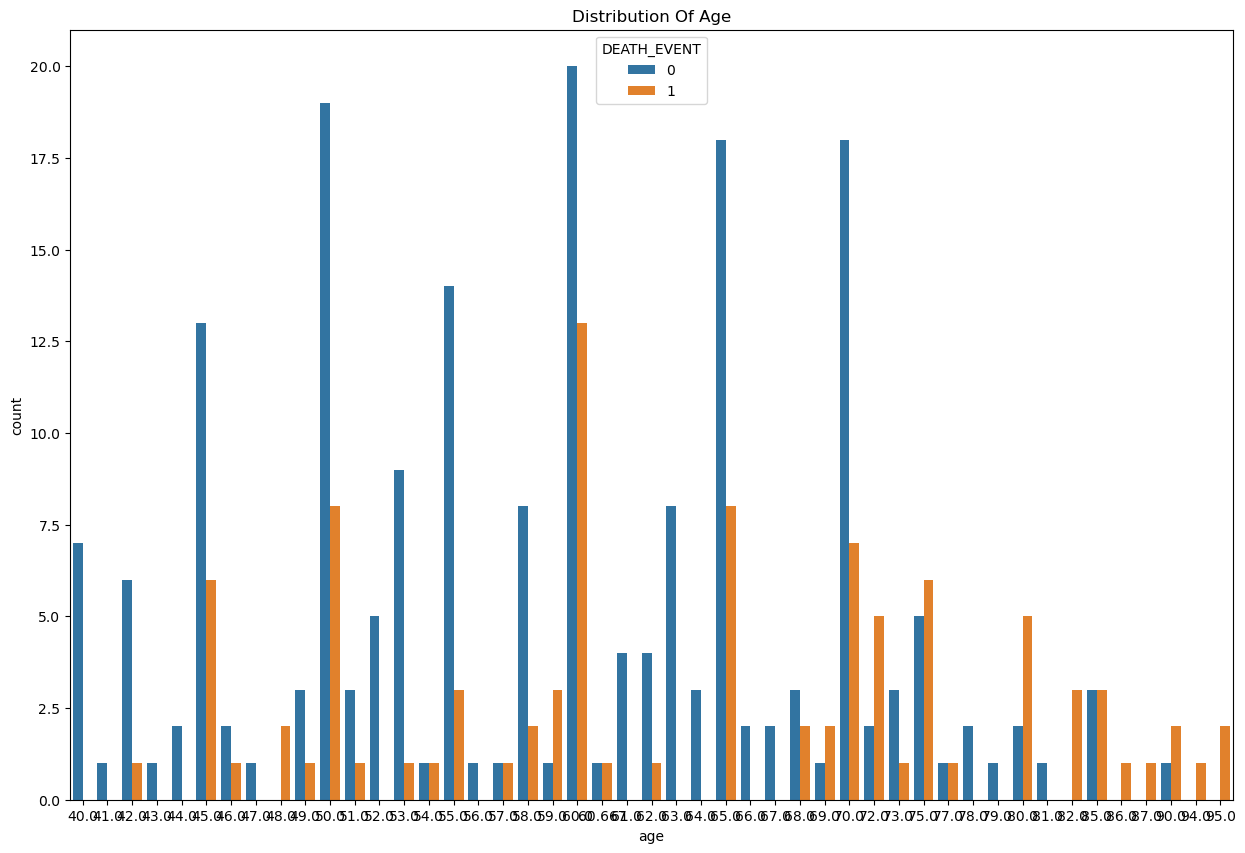

In [11]:
#심장병 발생하는 나이대 확인

plt.figure(figsize=(15,10))
Days_of_week = sns.countplot(x=data['age'], data=data, hue=data['DEATH_EVENT'])
Days_of_week.set_title("Distribution Of Age", color="black")

In [12]:
#age 데이터 - min 40, max 95
#발생 연령대로 봤을 때, 61세에서 가장 높은 비율 (>51 >66 순서로 높을 비율 차지)

Text(0.5, 1.0, 'platelets')

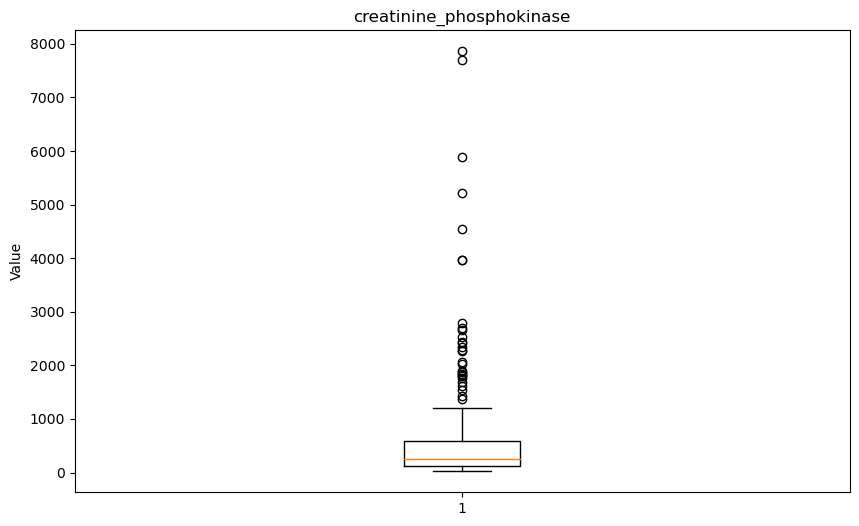

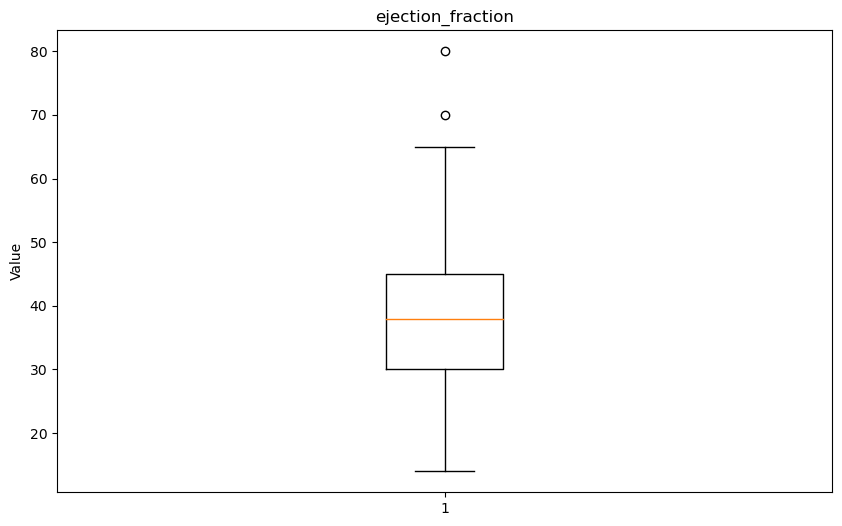

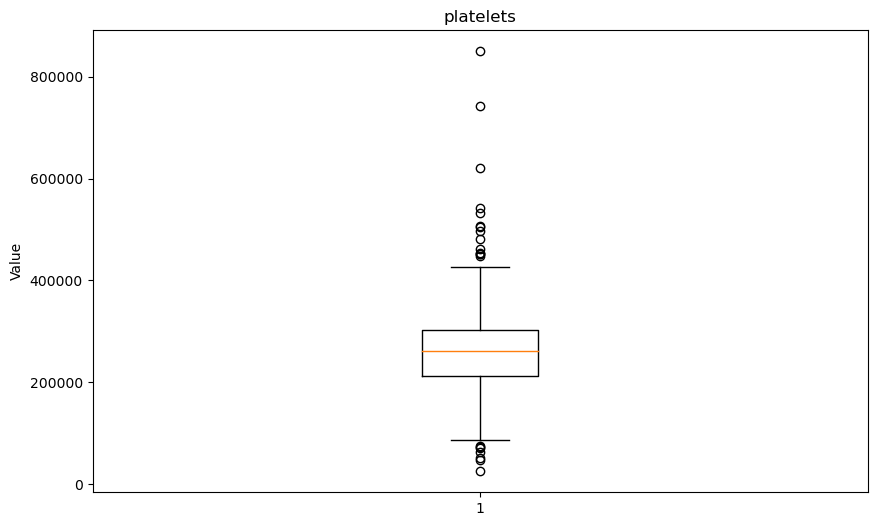

In [13]:
#항목별 box plot

#혈중 CPK 효소 수준
plt.figure(figsize=(10,6))
plt.boxplot(data['creatinine_phosphokinase'])
plt.ylabel('Value')
plt.title("creatinine_phosphokinase")

#수축 시 심장에서 나가는 혈액의 비율
plt.figure(figsize=(10,6))
plt.boxplot(data['ejection_fraction'])
plt.ylabel('Value')
plt.title("ejection_fraction")

#혈소판 - 혈액의 혈소판 수
plt.figure(figsize=(10,6))
plt.boxplot(data['platelets'])
plt.ylabel('Value')
plt.title("platelets")

In [ ]:
#위쪽 선 - 최대값
#아래쪽 선 - 최소값
#중앙선 - 중앙값
#박스 위쪽선 - 3사분위수
#박스 아래쪽선 - 1사분위수
#이상치값들이 많음

## Data 전처리

In [14]:
#종속변수와 독립변수 구분

x = data.drop(["DEATH_EVENT"], axis=1)
y = data["DEATH_EVENT"]

In [15]:
col_names = list(x.columns)
s_scaler = preprocessing.StandardScaler()
x_scaled = s_scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns = col_names)
x_scaled.describe().T

#StandardScaler - 모든 features를 평균 0, 분산 1인 정규분포로 만들어주는 표준화 작업
#훈련용 데이터셋은 fit 메서드를 적용시킨 후 transform 해주어야 하고, 테스트용 데이터셋에는 transform 을 적용

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.265205e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,3.594301e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,3.713120e-18,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,1.113936e-16,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,3.341808e-18,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,-4.841909e-16,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,1.009969e-16,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,-2.227872e-18,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.627435e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-5.940993e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [16]:
#train, test 데이터로 변수 split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state=25)

## Model Building

### SVM (Support Vector Machine)

In [17]:
#SVM 알고리즘 모델링 
model1=svm.SVC()

# Fitting the model 
model1.fit (x_train, y_train)

# Predicting the test variables
y_pred = model1.predict(x_test)

# Getting the score 
model1.score (x_test, y_test)

0.7888888888888889

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84        60
           1       0.69      0.67      0.68        30

    accuracy                           0.79        90
   macro avg       0.76      0.76      0.76        90
weighted avg       0.79      0.79      0.79        90



In [19]:
#recall의 수치가 가장 높음 => 실제 True인 것 중에 모델이 True라고 예측한 비율

<AxesSubplot:>

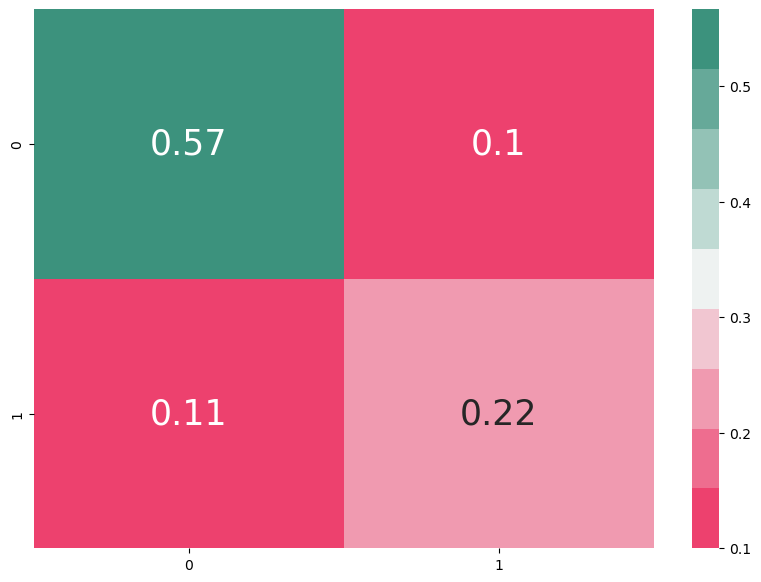

In [20]:
#confusion matrix로 표현

cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size' :25})

In [21]:
#순서대로 TN -> FN -> FP -> TP

### ANN (Artificial Neural Network)

In [ ]:
#사람의 신경망 원리와 구조를 모방하여 만든 기계학습 알고리즘

In [22]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [23]:
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks

#과적합을 방지하기 위한 콜백함수 - 적절한 시점에 학습을 종료
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

#ann 모델링
model = Sequential()

#layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

#Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Train the ANN
history = model.fit(x_train, y_train, batch_size = 25, epochs = 80,callbacks=[early_stopping], validation_split=0.25)

Epoch 1/80
7/7 [==============================] - 0s 21ms/step - loss: 0.6927 - accuracy: 0.6218 - val_loss: 0.6907 - val_accuracy: 0.8302
Epoch 2/80
7/7 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.6346 - val_loss: 0.6884 - val_accuracy: 0.8302
Epoch 3/80
7/7 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.6346 - val_loss: 0.6864 - val_accuracy: 0.8302
Epoch 4/80
7/7 [==============================] - 0s 4ms/step - loss: 0.6901 - accuracy: 0.6346 - val_loss: 0.6840 - val_accuracy: 0.8302
Epoch 5/80
7/7 [==============================] - 0s 4ms/step - loss: 0.6892 - accuracy: 0.6346 - val_loss: 0.6817 - val_accuracy: 0.8302
Epoch 6/80
7/7 [==============================] - 0s 4ms/step - loss: 0.6880 - accuracy: 0.6346 - val_loss: 0.6792 - val_accuracy: 0.8302
Epoch 7/80
7/7 [==============================] - 0s 4ms/step - loss: 0.6869 - accuracy: 0.6346 - val_loss: 0.6766 - val_accuracy: 0.8302
Epoch 8/80
7/7 [=================

Epoch 60/80
7/7 [==============================] - 0s 4ms/step - loss: 0.3490 - accuracy: 0.8718 - val_loss: 0.3219 - val_accuracy: 0.8302
Epoch 61/80
7/7 [==============================] - 0s 4ms/step - loss: 0.3737 - accuracy: 0.8397 - val_loss: 0.3232 - val_accuracy: 0.8302


In [ ]:
#EarlyStopping 설정

# monitor : 학습 조기종료를 위해 관찰하는 항목입니다. val_loss 나 val_accuracy 가 주로 사용됩니다. (default : val_loss)
# min_delta : 개선되고 있다고 판단하기 위한 최소 변화량을 나타냅니다. 만약 변화량이 min_delta 보다 적은 경우에는 개선이 없다고 판단합니다. (default = 0)
# patience : 개선이 안된다고 바로 종료시키지 않고, 개선을 위해 몇번의 에포크를 기다릴지 설정합니다. (default = 0)
# mode : 관찰항목에 대해 개선이 없다고 판단하기 위한 기준을 설정합니다. monitor에서 설정한 항목이 val_loss 이면 값이 감소되지 않을 때 종료하여야 하므로 min 을 설정하고, val_accuracy 의 경우에는 max를 설정해야 합니다. (default = auto)
    # auto : monitor에 설정된 이름에 따라 자동으로 지정합니다.
    # min : 관찰값이 감소하는 것을 멈출 때, 학습을 종료합니다.
    # max: 관찰값이 증가하는 것을 멈출 때, 학습을 종료합니다.

In [24]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))


val_accuracy is: 84.75%


In [25]:
# Predicting the test set results
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.4)
np.set_printoptions()

3/3 [==============================] - 0s 866us/step


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83        60
           1       0.66      0.77      0.71        30

    accuracy                           0.79        90
   macro avg       0.76      0.78      0.77        90
weighted avg       0.80      0.79      0.79        90



In [31]:
#ANN
#precision(정밀도) 비율이 가장 높음 => True라고 분류한 것 중 실제 True인 것

<AxesSubplot:>

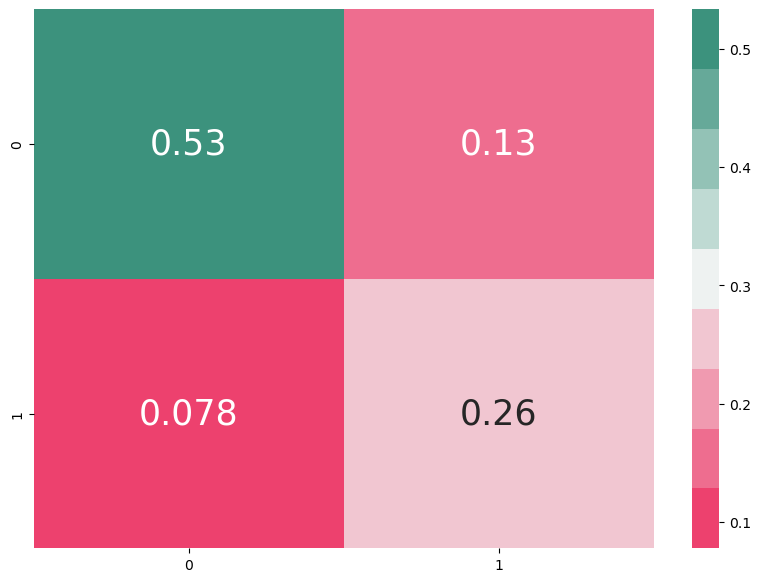

In [26]:
# Getting the confusion matrix
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

In [32]:
#순서대로 TN -> FN -> FP -> TP
#위 모델보다 FP(실제 False인 답을 True라고 예측하는것)가 현저히 줄었다!

In [33]:
from lazypredict.Supervised import LazyClassifier

OSError: dlopen(/Users/yoon/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/yoon/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found